In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
def residual_block(x, filters, stride=1):
    shortcut = x
    if stride > 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=(stride, stride), padding='same')(shortcut)

    x = layers.Conv2D(filters, (3, 3), strides=(stride, stride), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = layers.Conv2D(filters, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Add()([x, shortcut])
    x = tf.keras.layers.ReLU()(x)
    return x

In [ ]:
def build_resnet(input_shape=(28, 28, 1), num_classes=10):
    input_layer = tf.keras.layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_layer)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=512, stride=2)

    x = layers.GlobalAveragePooling2D()(x)

    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

In [ ]:
model = build_resnet(input_shape=(28, 28, 1), num_classes=10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=10,
                    validation_data=(test_images[..., tf.newaxis], test_labels))

Epoch 1/10
1875/1875 [==============================] - 38s 11ms/step - loss: 0.1345 - accuracy: 0.9594 - val_loss: 0.1276 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0651 - accuracy: 0.9808 - val_loss: 0.0869 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0501 - accuracy: 0.9852 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0436 - accuracy: 0.9877 - val_loss: 0.0631 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0486 -

In [ ]:
loss, accuracy = model.evaluate(test_images[..., tf.newaxis], test_labels)
print(f'Test Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 5ms/step - loss: 0.0283 - accuracy: 0.9922
Test Loss: 0.0283
Accuracy: 0.9922


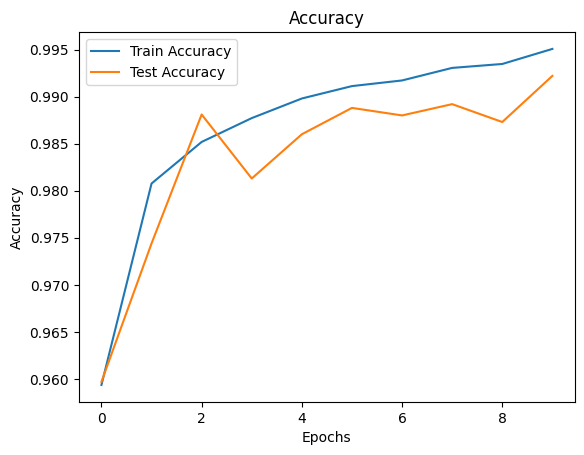

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

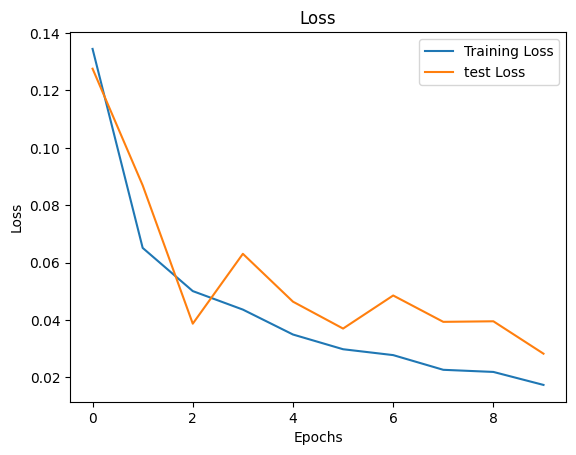

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='test Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()